In [87]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

mnist dataset http://yann.lecun.com/exdb/mnist/


In [62]:
MNIST_DIR = "../mnist/"

In [63]:
train_arr = idx2numpy.convert_from_file(MNIST_DIR + "train-images-idx3-ubyte")
train_labels = idx2numpy.convert_from_file(MNIST_DIR + "train-labels-idx1-ubyte")

In [64]:
print(train_arr.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [65]:
print(np.min(train_arr), np.max(train_arr))

0 255


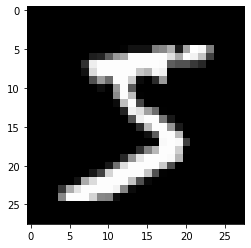

In [66]:
plt.imshow(train_arr[0], cmap="gray")
plt.show()

In [67]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [68]:
X_train = train_arr.reshape(60000, -1)
X_train.shape

(60000, 784)

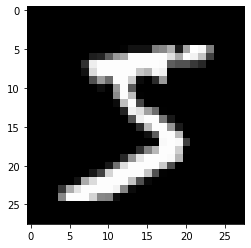

In [69]:
plt.imshow(X_train[0].reshape(28, 28), cmap="gray")
plt.show()

In [70]:
X_train = X_train / 255.0

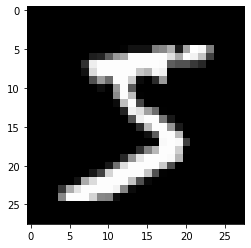

In [71]:
plt.imshow(X_train[0].reshape(28, 28), cmap="gray")
plt.show()

In [72]:
y_train = np.copy(train_labels)

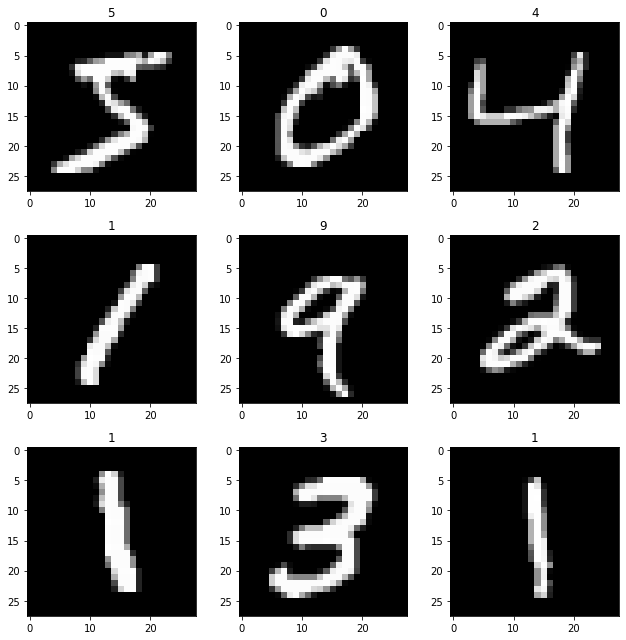

In [73]:
plt.figure(figsize=(9, 9))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title(str(y_train[i]))
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")

plt.tight_layout()
plt.show()

### Veri seti oluşturma

Veri setini 0'dan 9'a kadarki rakamlar yerine sadece 3 ve 7'ye indirgeyeceğiz.<br>
Eğer resimde 3 yazısı varsa karşılığı 0; 7 yazısı varsa karşılığı 1 olacak.


In [74]:
X_3 = X_train[y_train == 3]

In [75]:
X_3.shape

(6131, 784)

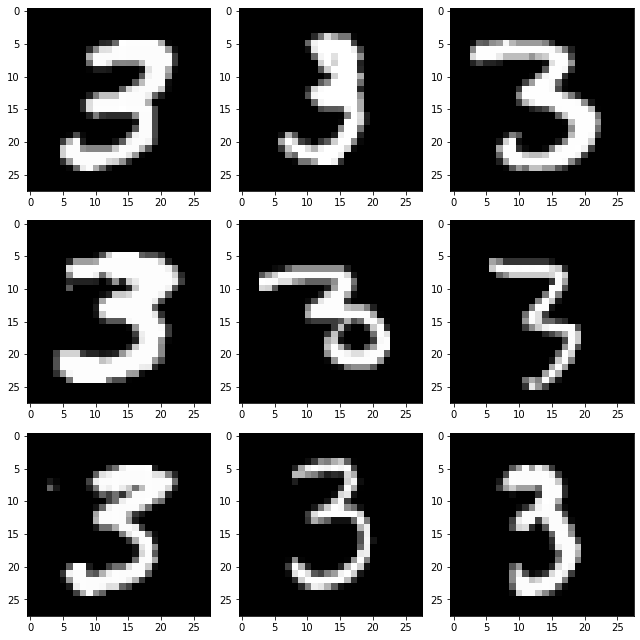

In [76]:
plt.figure(figsize=(9, 9))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_3[i].reshape(28, 28), cmap="gray")

plt.tight_layout()
plt.show()

In [77]:
X_7 = X_train[y_train == 7]
X_7.shape

(6265, 784)

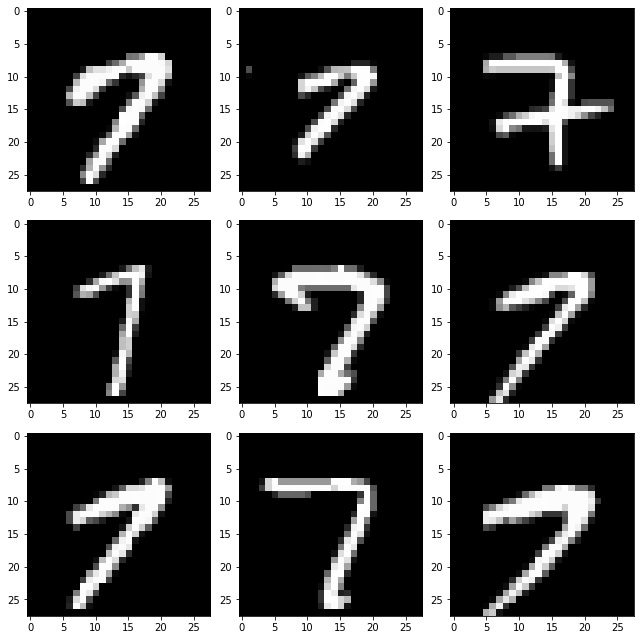

In [78]:
plt.figure(figsize=(9, 9))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_7[i].reshape(28, 28), cmap="gray")

plt.tight_layout()
plt.show()

In [79]:
y_3 = np.zeros(X_3.shape[0])

In [80]:
y_7 = np.ones(X_7.shape[0])

In [81]:
print(y_3[:5])
print(y_7[:5])

[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]


In [82]:
X_train_subset = np.append(X_3, X_7, axis=0)

In [83]:
X_train_subset.shape

(12396, 784)

In [84]:
y_train_subset = np.append(y_3, y_7)

In [85]:
y_train_subset.shape

(12396,)

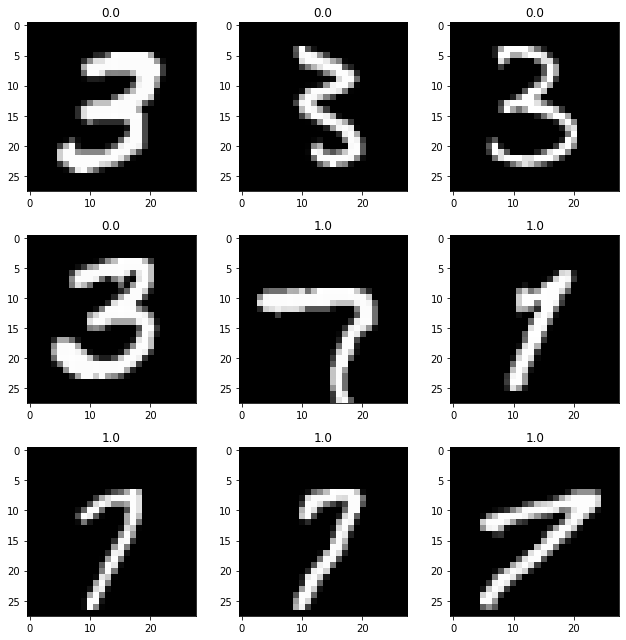

In [86]:
ds_check_indexes = [0, 1000, 5000, 5200, 6200, 11000, 12300, 12301, 12395]

plt.figure(figsize=(9, 9))

for i, index in enumerate(ds_check_indexes):
    plt.subplot(3, 3, i+1)
    plt.title(str(y_train_subset[index]))
    plt.imshow(X_train_subset[index].reshape(28, 28), cmap="gray")

plt.tight_layout()
plt.show()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=42)

In [89]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9916, 784) (9916,)
(2480, 784) (2480,)


In [90]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [91]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        ones_column = np.ones((num_samples, 1))
        X = np.append(ones_column, X, axis=1)
        self.weights = np.zeros(num_features + 1)

        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights)
            y_predicted = sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            self.weights = self.weights - (self.lr * dw)

    def predict(self, X):
        num_samples, _ = X.shape
        ones_column = np.ones((num_samples, 1))
        X = np.append(ones_column, X, axis=1)
        
        linear_model = np.dot(X, self.weights)
        y_predicted = sigmoid(linear_model)
        y_predicted_classes = np.where(y_predicted > 0.5, 1, 0)
        return y_predicted_classes

In [92]:
def accuracy(y_true, y_predicted):
    acc = np.sum(y_true == y_predicted) / len(y_predicted)
    return acc

In [93]:
regressor = LogisticRegression(lr=0.001, n_iters=1000)
regressor.fit(X_train, y_train)

y_predictions = regressor.predict(X_test)
print(accuracy(y_test, y_predictions))

0.969758064516129


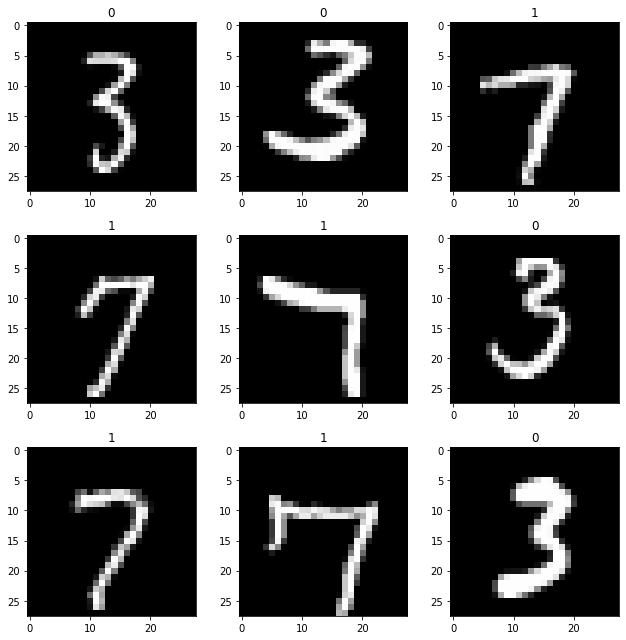

In [94]:
plt.figure(figsize=(9, 9))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title(str(y_predictions[i]))
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

plt.tight_layout()
plt.show()